In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator 
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_city
from qiskit_ibm_runtime import Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

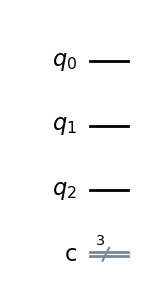

In [2]:
qc = QuantumCircuit(3,3)
qc.draw("mpl")

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


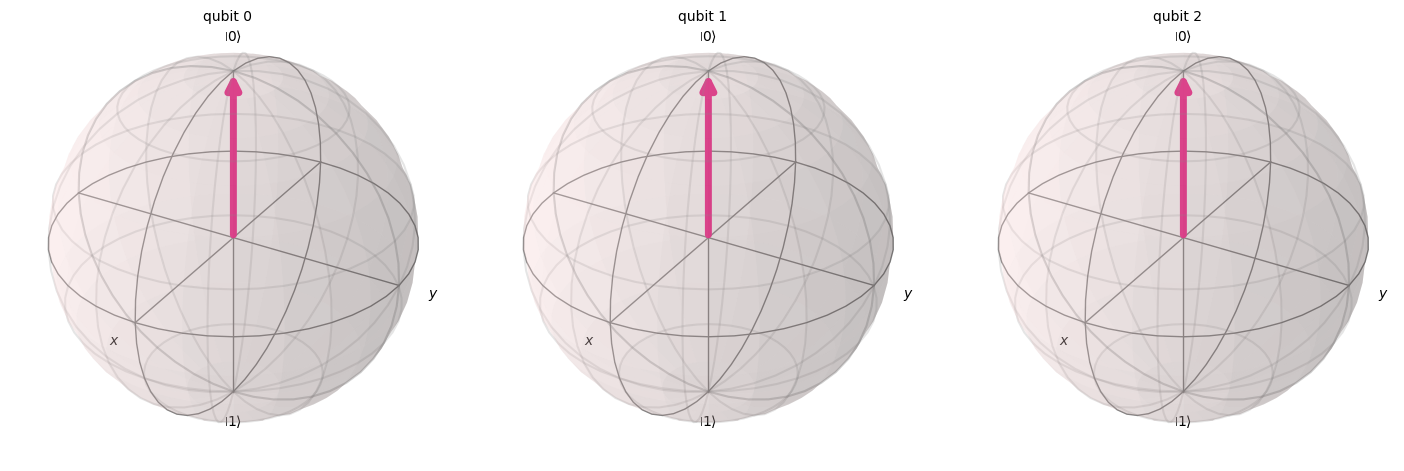

In [3]:
out_vector = Statevector(qc)
print(out_vector)
plot_bloch_multivector(out_vector)

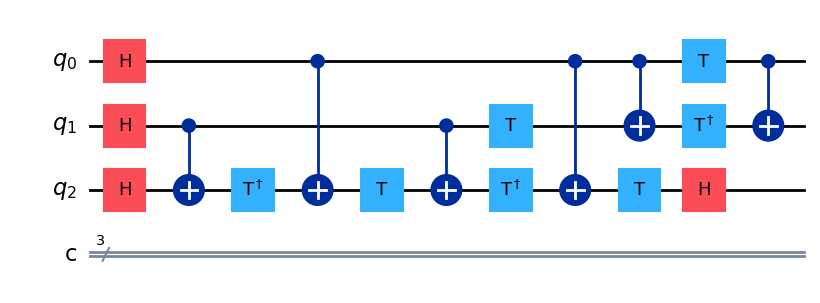

In [4]:
qc.h(0)
qc.h(1)
qc.h(2)
qc.cx(1,2)
qc.tdg(2)
qc.cx(0,2)
qc.t(2)
qc.cx(1,2)
qc.tdg(2)
qc.cx(0,2)
qc.t(1)
qc.t(2)
qc.h(2)
qc.cx(0,1)
qc.t(0)
qc.tdg(1)
qc.cx(0,1)

qc.draw('mpl')

Statevector([ 5.00000000e-01+0.j,  5.00000000e-01+0.j,  5.00000000e-01+0.j,
             -6.73463194e-18+0.j,  7.88157872e-17+0.j,  1.18079001e-17+0.j,
             -6.73463194e-18+0.j,  5.00000000e-01+0.j],
            dims=(2, 2, 2))


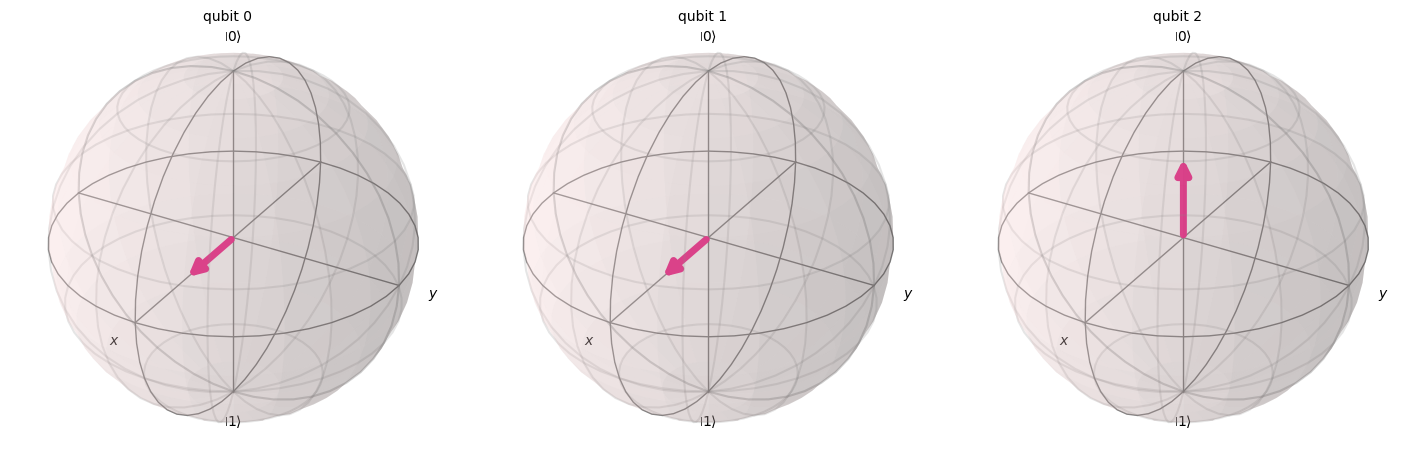

In [5]:
out_vector = Statevector(qc)
print(out_vector)
plot_bloch_multivector(out_vector)
# plot_state_city(out_vector)

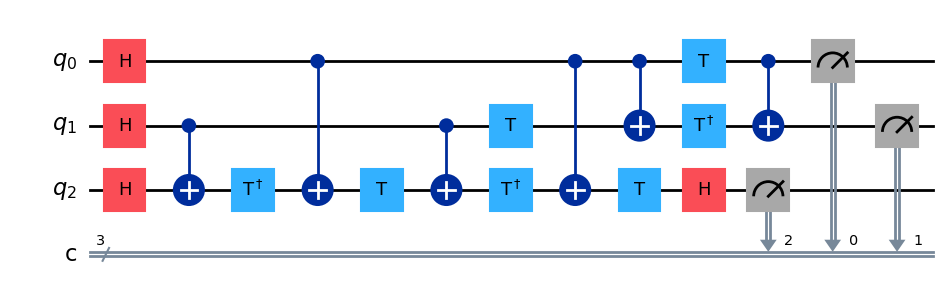

In [6]:
qc.measure([0,1,2],[0,1,2])
qc.draw(output="mpl")

Measurement results: {'111': 258, '001': 266, '010': 233, '000': 243}


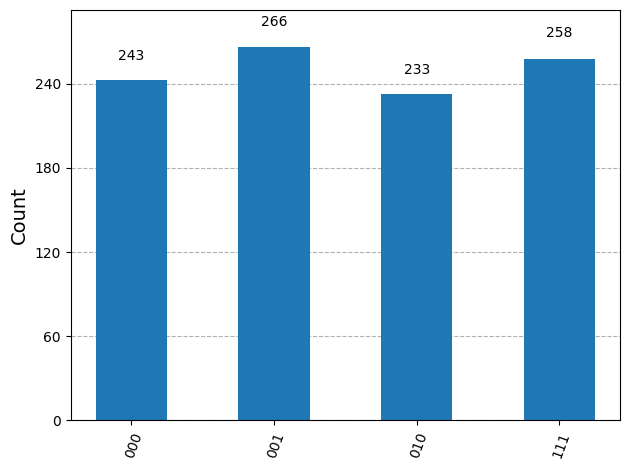

In [7]:
simulator = AerSimulator()
job = simulator.run(qc, shots=1000)
result = job.result()
counts = result.get_counts(qc)

print("Measurement results:", counts)
plot_histogram(counts)